In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [29]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.to_csv("iris_data.csv", index=False)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [30]:
# seperate independent and dependent feature
X = df.drop(columns=['target','target_name'], axis=1)
y = df['target']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
# Apply decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(max_depth=2)
# Train the model using the training data
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

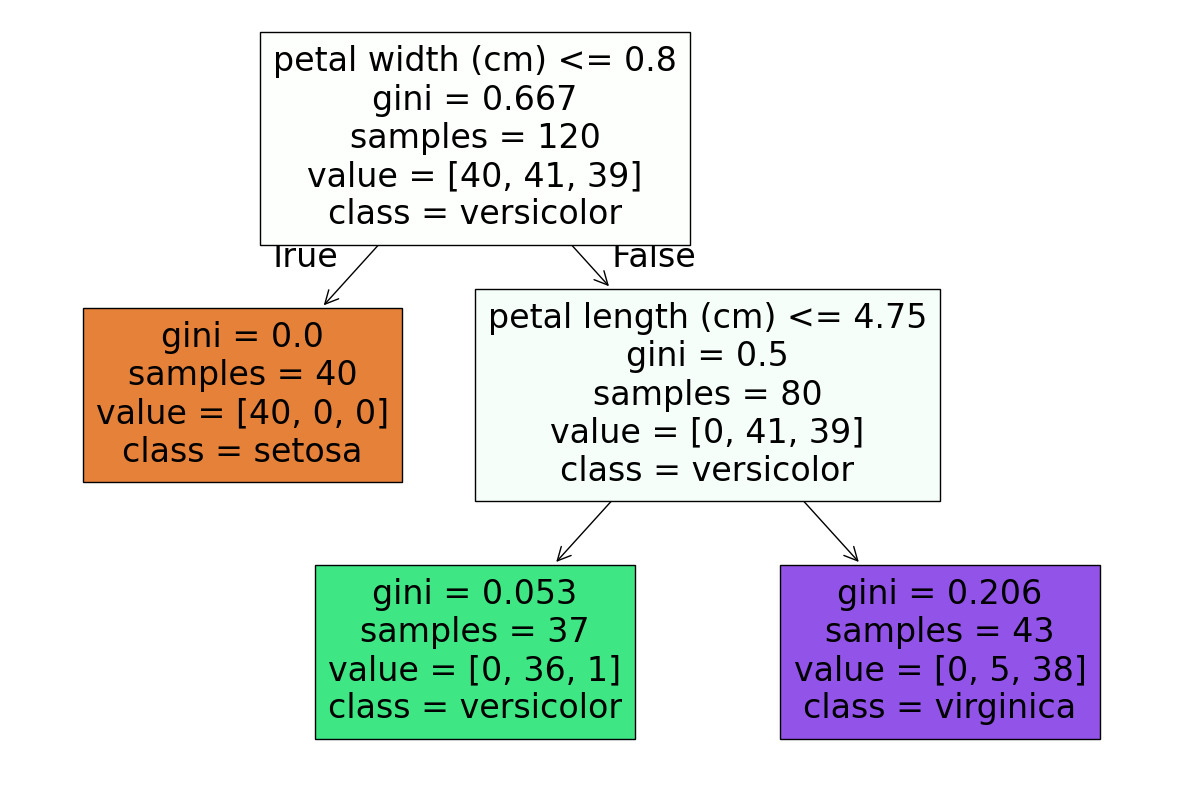

In [45]:
# Visualize the decision tree classifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(tree_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# This indicates that the tree is constructed till depth--> risk of overfitting 
# So to prevent we use pruning(post)
# we can see after the depth of 2 the model is unnecessarily splitting beacuse at the depth of 2 our model can 
# already predict the class with 100% accuracy. So we can stop the tree construction at depth of 2.

In [34]:
# predict the values
y_pred = tree_classifier.predict(X_test)
print(f'The predicted values are : {y_pred}')

The predicted values are : [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [39]:
# comparing the test data and the predicted data
compare = pd.DataFrame({
    'y_test' : y_test,
    'y_pred' : y_pred,
}).reset_index(drop=True)
compare.head()

,y_test,y_pred
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2


In [41]:
# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}")
print(f"Classification Report : \n{classification_report(y_test,y_pred)}")
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')

Confusion Matrix : 
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy Score : 0.9666666666666667


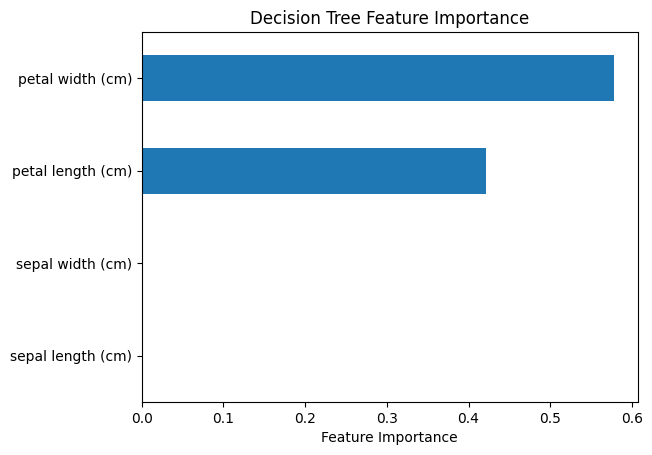

In [46]:
#Feature Importance Plot
import matplotlib.pyplot as plt
import pandas as pd

importances = tree_classifier.feature_importances_
features = X.columns
# Plot
pd.Series(importances, index=features).sort_values().plot(kind='barh')
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()
#Helps identify which features the tree considers most significant.

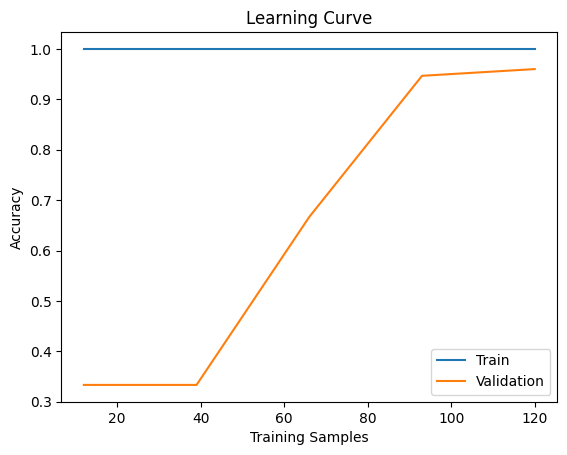

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    DecisionTreeClassifier(), X, y, cv=5)

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.legend()
plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.show()
# Useful for spotting overfitting or underfitting.

#✅ Inference (in simple words):
#Your Decision Tree learns the training data perfectly (accuracy = 100%).
#But it does not perform well on validation data when the training size is small.
#As you add more training data, the model improves on validation data.
#At the end, training and validation accuracy are both high, so the model is doing well.

#What it means:
#The model overfits when there’s little data.
#It gets better with more data.
#Still, a little overfitting is present (training = 100%, validation < 100%).

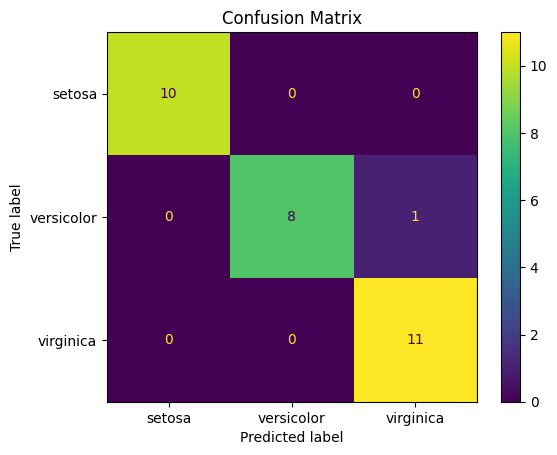

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm,display_labels=iris.target_names).plot()
plt.title("Confusion Matrix")
plt.show()
